<a href="https://colab.research.google.com/github/Chaitanya-Gumudala-1710/deep_learning/blob/main/hand_written_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


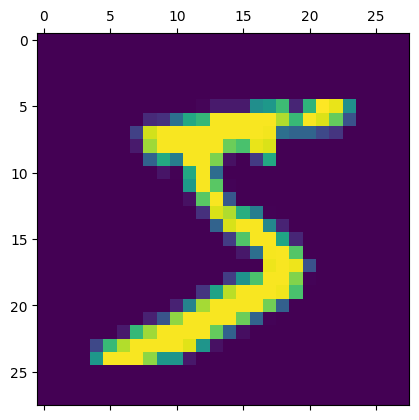

In [3]:
plt.matshow(X_train[0])
plt.show()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
flattened_X_train = X_train.reshape(len(X_train),  28 * 28)
flattened_X_test = X_test.reshape(len(X_test), 28 * 28)

In [6]:
flattened_X_train.shape

(60000, 784)

In [7]:
flattened_X_test.shape

(10000, 784)

In [8]:
model_without_hidden_layer = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])
model_without_hidden_layer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
model_without_hidden_layer.fit(flattened_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4698 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2727 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [10]:
model_without_hidden_layer.evaluate(flattened_X_test, y_test)

313/313 [==============================] - 0s 932us/step - loss: 0.2691 - accuracy: 0.9247


[0.2690928280353546, 0.9247000217437744]

In [11]:
y_predicted = model_without_hidden_layer.predict(flattened_X_test)

313/313 [==============================] - 0s 840us/step


In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

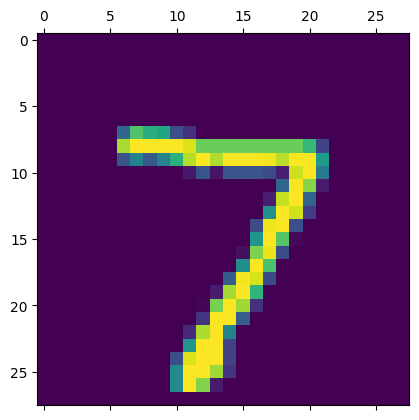

In [13]:
plt.matshow(X_test[0])
plt.show()

In [14]:
y_predicted[0]

array([3.1513132e-02, 3.4460984e-07, 4.7514617e-02, 9.5413017e-01,
       2.5359751e-03, 1.3091490e-01, 1.0196704e-06, 9.9974823e-01,
       1.2505202e-01, 6.4189005e-01], dtype=float32)

In [15]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

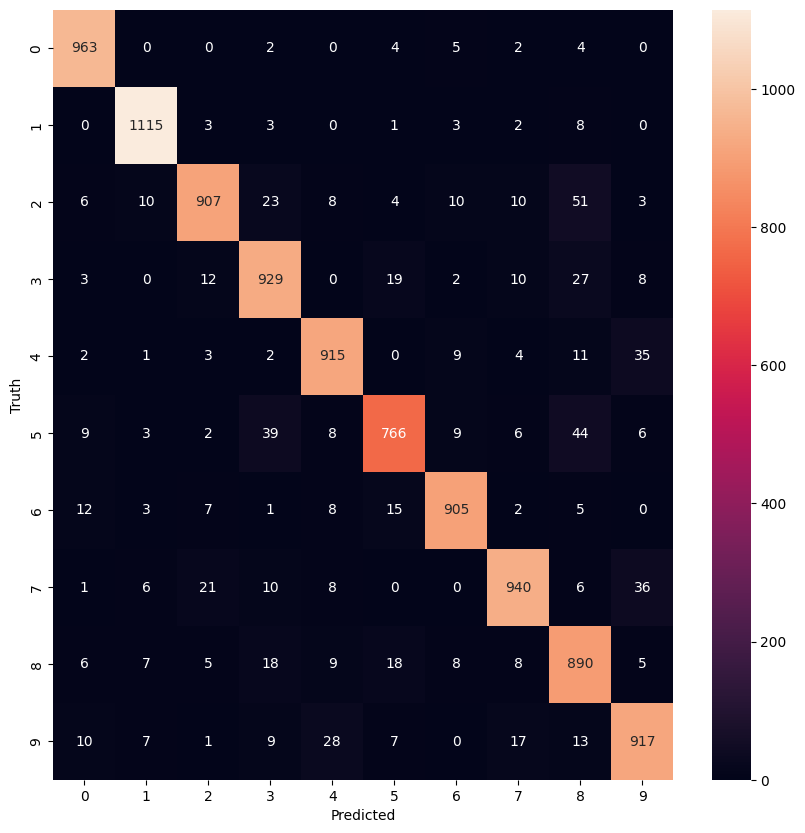

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
model_with_hidden_layer = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model_with_hidden_layer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model_with_hidden_layer.fit(flattened_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9833


In [19]:
model_with_hidden_layer.evaluate(flattened_X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9755


[0.07758745551109314, 0.9754999876022339]

In [20]:
y_predicted = model_with_hidden_layer.predict(flattened_X_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

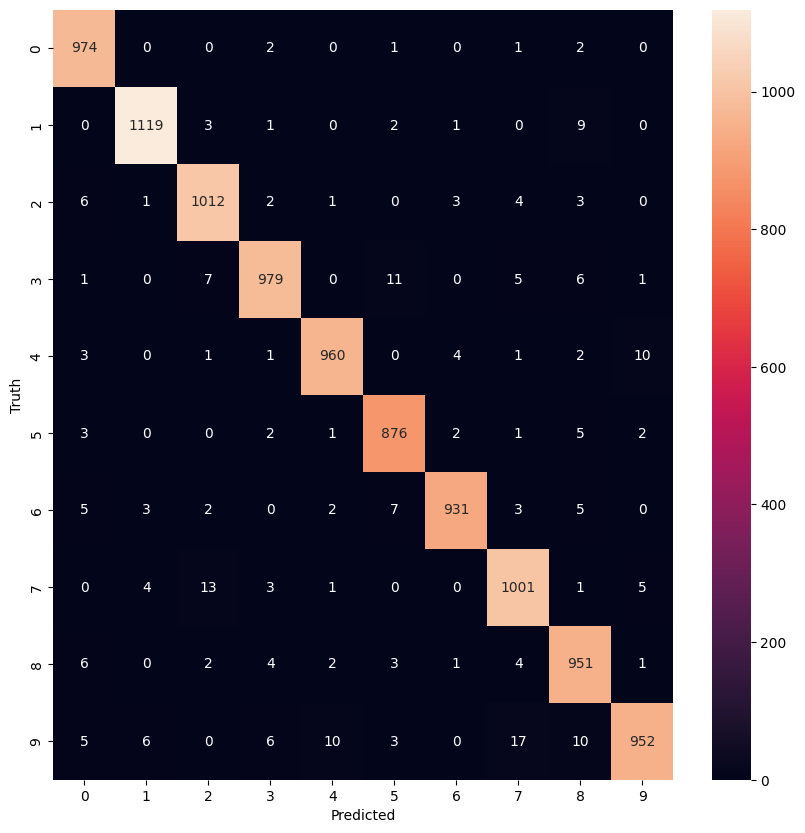

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()